In [110]:
import pandas as pd
import numpy as np

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import sys
import os

path= "C:\\Users\\Aman\\Desktop\\MODIFIED-FRAUD-DETECTION\\src"
sys.path.append(os.path.abspath(path=path))

try:
    from data_preprocessing import DataPreprocessing
    # from feature_engineering import featureEnginerring
except:
    print("Import failure")

In [113]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

In [114]:

data_processing = DataPreprocessing()
df_fraud = pd.read_csv('C:\\Users\\Aman\\Desktop\\MODIFIED-FRAUD-DETECTION\\data\\processed\\modeified_data.csv')
# df_country_code = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw8-9\\data\\raw\\IpAddress_to_Country.csv')


In [115]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      151112 non-null  int64  
 1   user_id         151112 non-null  int64  
 2   purchase_value  151112 non-null  int64  
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             151112 non-null  int64  
 7   ip_address      151112 non-null  int64  
 8   country         151112 non-null  object 
 9   day_of_week     151112 non-null  int64  
 10  time_diff(hr)   151112 non-null  float64
 11  class           151112 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 13.8+ MB


In [116]:
df_fraud.columns

Index(['Unnamed: 0', 'user_id', 'purchase_value', 'source', 'browser', 'sex',
       'age', 'ip_address', 'country', 'day_of_week', 'time_diff(hr)',
       'class'],
      dtype='object')

In [117]:
numerical_columns =['user_id','purchase_value', 'age', 'time_diff(hr)',
                    'day_of_week', 'ip_address']
categorical_colmns =['browser','source', 'country']

preprocesser = ColumnTransformer([
    ('scaler', StandardScaler(),numerical_columns),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False), categorical_colmns)
])

randomforest = Pipeline([
    
    ('preprocessor', preprocesser,),
    ('model', RandomForestClassifier(n_estimators=30, max_depth=2))
])

gradientboosting = Pipeline([
    
    ('preprocessor', preprocesser,),
    ('model', GradientBoostingClassifier(n_estimators=10, n_iter_no_change=10))
])

logisticreg = Pipeline([
    
    ('preprocessor', preprocesser,),
    ('model', LogisticRegression(random_state=42))
])
decisiontree = Pipeline([
    
    ('preprocessor', preprocesser,),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [118]:
x = df_fraud.drop('class', axis=1)
y = df_fraud['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [119]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
# Feature Scaling (Important for better training performance)
scaler = StandardScaler()
X_train = preprocesser.fit_transform(x_train)
X_test = preprocesser.transform(x_test)



In [122]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    layers.Dense(32, activation='relu'),  
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,529 (56.75 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=25,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9071 - loss: 0.3157 - val_accuracy: 0.9071 - val_loss: 0.3059
Epoch 2/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9050 - loss: 0.3048 - val_accuracy: 0.9074 - val_loss: 0.2977
Epoch 3/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9070 - loss: 0.2944 - val_accuracy: 0.9084 - val_loss: 0.2929
Epoch 4/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9070 - loss: 0.2901 - val_accuracy: 0.9089 - val_loss: 0.2916
Epoch 5/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9098 - loss: 0.2810 - val_accuracy: 0.9102 - val_loss: 0.2867
Epoch 6/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9107 - loss: 0.2770 - val_accuracy: 0.9106 - val_loss: 0.2842
Epoch 7/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9118 - loss: 0.2714 - val_accuracy: 0.9117 - val_loss: 0.2837
Epoch 8/25
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9129 - loss: 0

In [124]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict class probabilities
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary output

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9174 - loss: 0.2685
Test Accuracy: 0.9169
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     27424
           1       0.76      0.19      0.30      2799

    accuracy                           0.92     30223
   macro avg       0.84      0.59      0.63     30223
weighted avg       0.91      0.92      0.90     30223



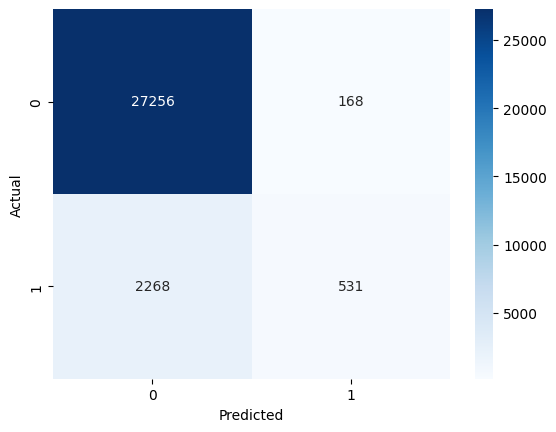

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [72]:
# print(type(logisticreg))
import joblib
joblib.dump(model,'mlps.joblib')
joblib.dump(preprocesser, 'preprocessor.joblib')
# joblib.dump(decisiontree,'decisiontree.pkl')



['preprocessor.joblib']

In [130]:
y_test[y_test==1]

15       1
24       1
27       1
37       1
45       1
        ..
30200    1
30207    1
30210    1
30217    1
30219    1
Name: class, Length: 2808, dtype: int64

In [136]:
preds0 = x_test.iloc[[14]]


In [137]:
preds0

,Unnamed: 0,user_id,purchase_value,source,browser,sex,age,ip_address,country,day_of_week,time_diff(hr)
14,71087,344470,28,SEO,Chrome,M,45,3868441302,undefined,0,0.0


In [138]:
preds0 = x_test.iloc[[14]]
processed = preprocesser.transform(preds0)

In [139]:
# processed = preprocesser.transform(preds0)
pred =model.predict(processed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [140]:
pred

array([[0.12704356]], dtype=float32)